In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cyclist_behavior_path = './Qualitative data Cyclist Behavior.csv'
df_cyclist_behavior = pd.read_csv(cyclist_behavior_path, header=0)
df_cyclist_behavior.head()

,Which age group do you belong to? (in years),Gender,How often do you currently use bike trails in the county? (During summer & Fall),What is your average cycling duration per trip? (in hours),What is your preferred trail length for a typical ride?,"How important is it for bike trails to connect to other trails or local destinations (e.g., parks, shopping areas)?"
0,25-34,1,3,Less than 1 hour,5 - 10 miles,2
1,45-54,1,3,1 - 2 hours,10 - 20 miles,0
2,65-80,1,2,1 - 2 hours,10 - 20 miles,2
3,45-54,0,4,3 - 4 hours,5 - 10 miles,1
4,55-64,0,3,3 - 4 hours,More than 20 miles,2


In [3]:
way_to_find_trail_path = './Way to find info of Bike Trail.csv'
df_way_to_find_trail = pd.read_csv(way_to_find_trail_path, header=0)
df_way_to_find_trail.head()

,Which age group do you belong to? (in years),Gender,County websites,Bike trail pamphlets,Social Media,Fitness application,Map
0,25-34,1,1.0,1.0,0.0,0.0,1.0
1,45-54,1,0.0,1.0,0.0,0.0,1.0
2,65-80,1,1.0,1.0,1.0,0.0,0.0
3,45-54,0,1.0,0.0,1.0,0.0,1.0
4,55-64,0,1.0,0.0,0.0,1.0,0.0


In [4]:
amenity_preferance_path = './Amenities Count.csv'
df_amenity_preferance = pd.read_csv(amenity_preferance_path, header=0)
df_amenity_preferance.head()

,Which age group do you belong to? (in years),Gender,Restrooms,Water fountains,Bike repair stations,Picnic areas,Parking
0,25-34,1,1.0,1.0,1.0,1.0,0.0
1,45-54,1,1.0,1.0,1.0,0.0,0.0
2,65-80,1,1.0,0.0,0.0,0.0,1.0
3,45-54,0,1.0,1.0,1.0,0.0,0.0
4,55-64,0,1.0,1.0,0.0,0.0,1.0


In [5]:
feature_preferance_path = './Features Count.csv'
df_feature_preferance = pd.read_csv(feature_preferance_path, header=0)
df_feature_preferance.head()

,Which age group do you belong to? (in years),Gender,Scenic views,Rest areas,Signage and Maps,Wildlife viewing,Historical markers
0,25-34,1,1.0,1.0,1.0,0.0,0.0
1,45-54,1,1.0,0.0,1.0,0.0,0.0
2,65-80,1,1.0,0.0,1.0,0.0,0.0
3,45-54,0,1.0,0.0,1.0,1.0,0.0
4,55-64,0,1.0,1.0,1.0,0.0,0.0


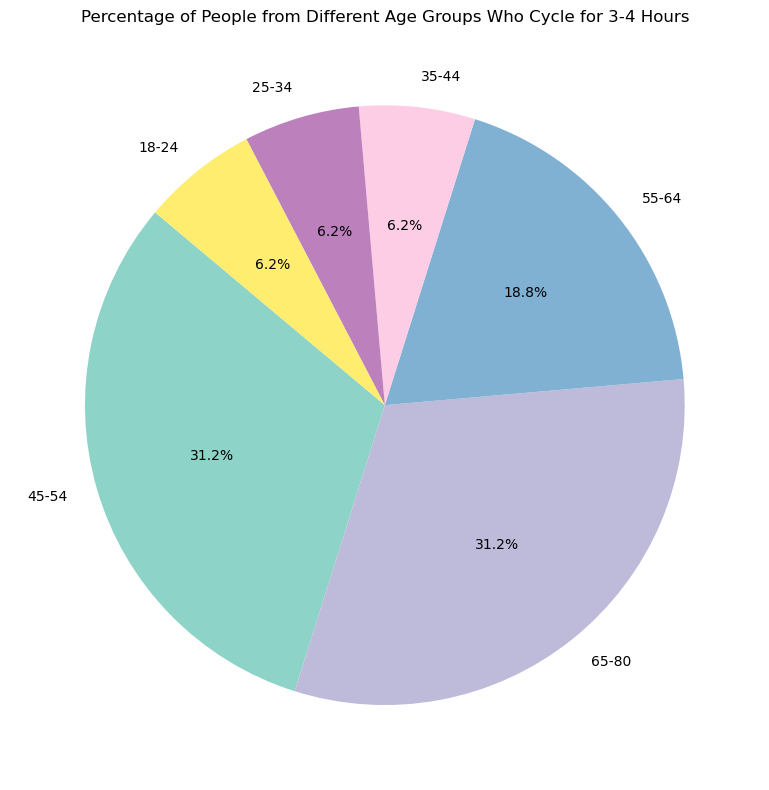

In [6]:
# Filter the data for those who cycle for 3-4 hours
df_3_4_hours = df_cyclist_behavior[df_cyclist_behavior['What is your average cycling duration per trip? (in hours)'] == '3 - 4 hours']

# Count the number of people from different age groups who cycle for 3-4 hours
age_group_counts_3_4_hours = df_3_4_hours['Which age group do you belong to? (in years)'].value_counts()

# Calculate the percentage of each age group
age_group_percentage_3_4_hours = age_group_counts_3_4_hours / age_group_counts_3_4_hours.sum() * 100

# Plotting the pie chart
plt.figure(figsize=(10, 8))
age_group_percentage_3_4_hours.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Percentage of People from Different Age Groups Who Cycle for 3-4 Hours')
plt.ylabel('')  # Hide the y-label
plt.tight_layout()

# Display the chart
plt.show()

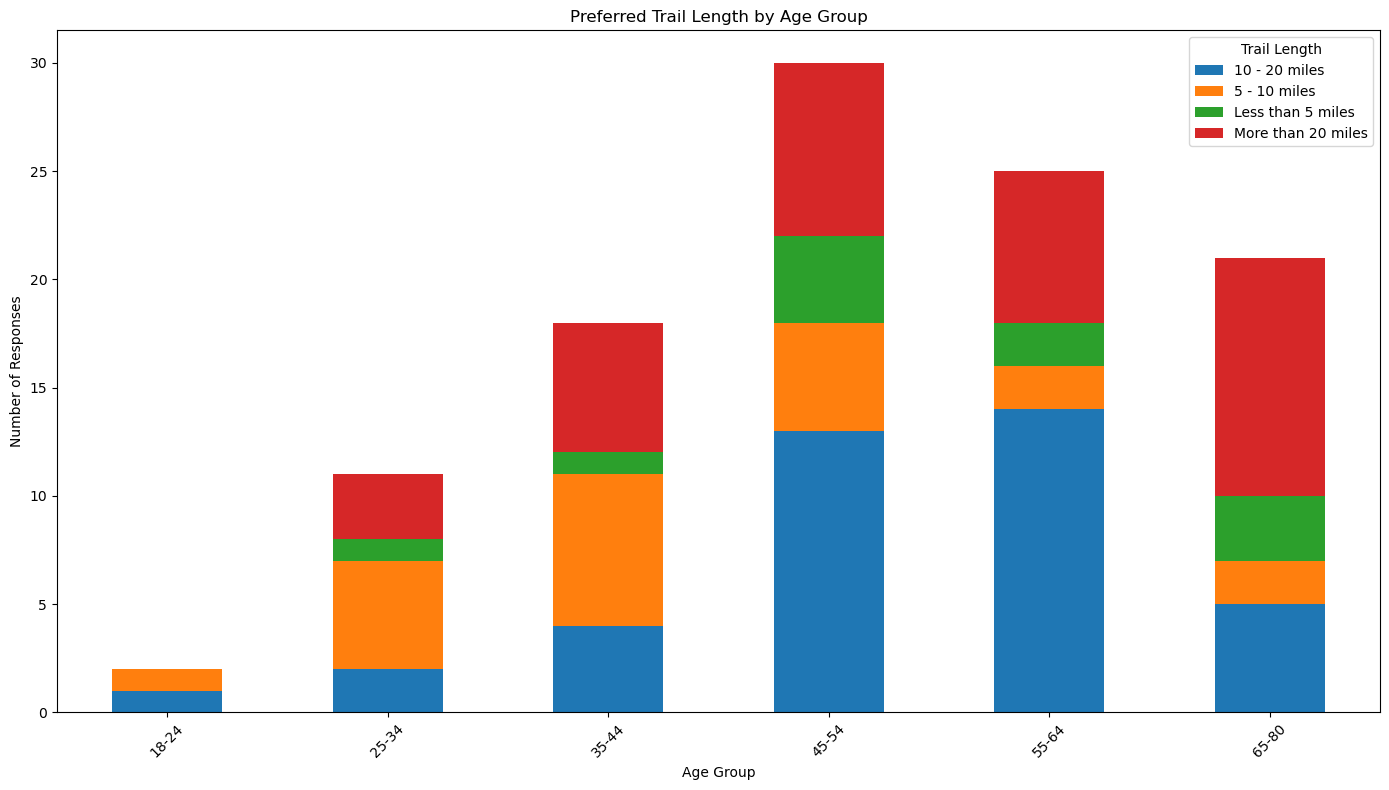

In [7]:
# Group by the age group and count the number of trail length preferences in the new dataset
trail_preference_counts_new = df_cyclist_behavior.groupby('Which age group do you belong to? (in years)')['What is your preferred trail length for a typical ride?'].value_counts().unstack().fillna(0)

# Plotting the bar chart for the new dataset
trail_preference_counts_new.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Preferred Trail Length by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Responses')
plt.legend(title='Trail Length')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

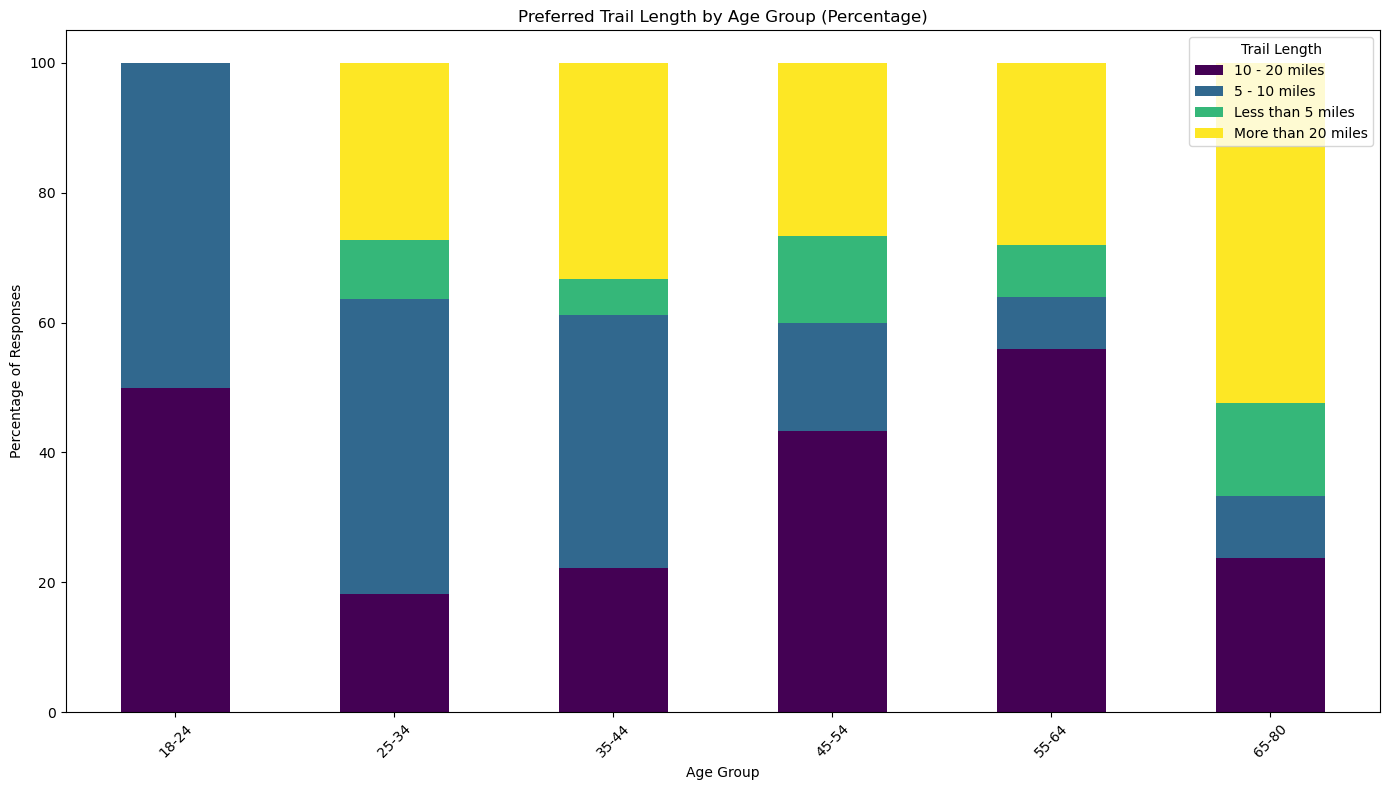

In [8]:
# Calculate the percentage of trail length preferences within each age group
trail_preference_percentage = trail_preference_counts_new.div(trail_preference_counts_new.sum(axis=1), axis=0) * 100

# Plotting the bar chart for the percentages
trail_preference_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Preferred Trail Length by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Responses')
plt.legend(title='Trail Length')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

In [9]:
# Filter the data for the elderly population (65-80 years and above)
elderly_data = df_cyclist_behavior[df_cyclist_behavior['Which age group do you belong to? (in years)'].isin(['65-80', '80+'])]

# Count the number of trail length preferences for the elderly population
elderly_trail_preference_counts = elderly_data['What is your preferred trail length for a typical ride?'].value_counts()

# Calculate the percentage of each trail length preference
elderly_trail_preference_percentage = elderly_trail_preference_counts / elderly_trail_preference_counts.sum() * 100

# Display the results
elderly_trail_preference_percentage

What is your preferred trail length for a typical ride?
More than 20 miles    52.380952
10 - 20 miles         23.809524
Less than 5 miles     14.285714
5 - 10 miles           9.523810
Name: count, dtype: float64

In [10]:
# This Box can only run ONCE, this alter the column name
df_amenity_preferance = df_amenity_preferance[
    ~df_amenity_preferance['Which age group do you belong to? (in years)'].str.contains('Which age group', na=False)
]
df_amenity_preferance = df_amenity_preferance.rename(
    columns={'Which age group do you belong to? (in years)': 'Age_Group'})

df_feature_preferance = df_feature_preferance[
    ~df_feature_preferance['Which age group do you belong to? (in years)'].str.contains('Which age group', na=False)
]
df_feature_preferance = df_feature_preferance.rename(
    columns={'Which age group do you belong to? (in years)': 'Age_Group'})

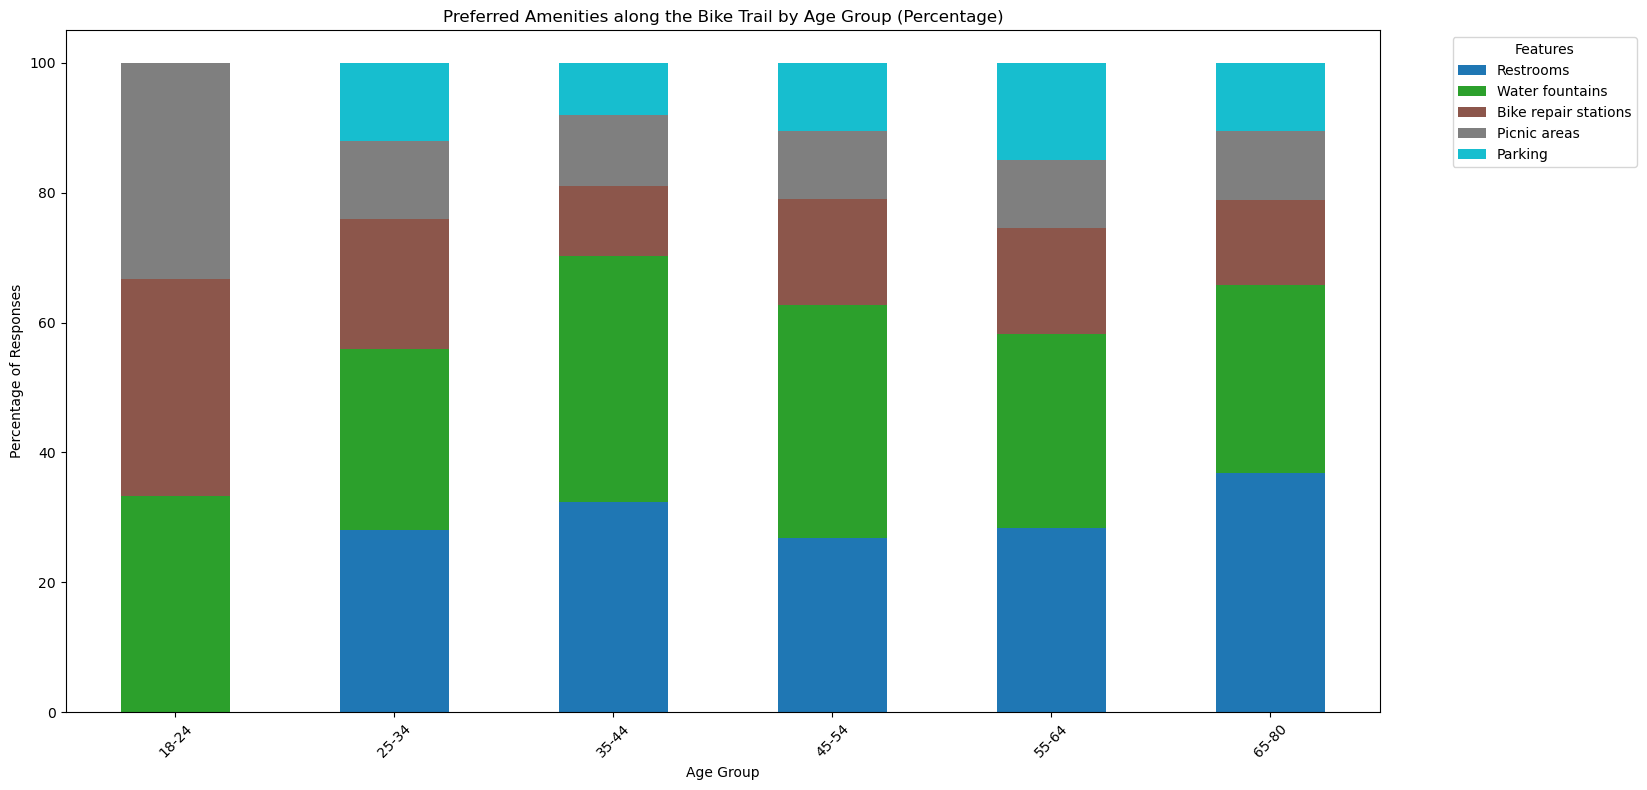

In [11]:
# Group by the age group and count the number of each preferred amenity
amenities_counts = df_amenity_preferance.groupby('Age_Group')[
    ['Restrooms', 'Water fountains', 'Bike repair stations', 'Picnic areas', 'Parking']
].sum()

# Calculate the percentage of each preferred amenity within each age group
amenities_percentage = amenities_counts.div(amenities_counts.sum(axis=1), axis=0) * 100

# Plotting the bar chart for the percentages
amenities_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Preferred Amenities along the Bike Trail by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Responses')
plt.legend(title='Amenities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the chart
plt.show()

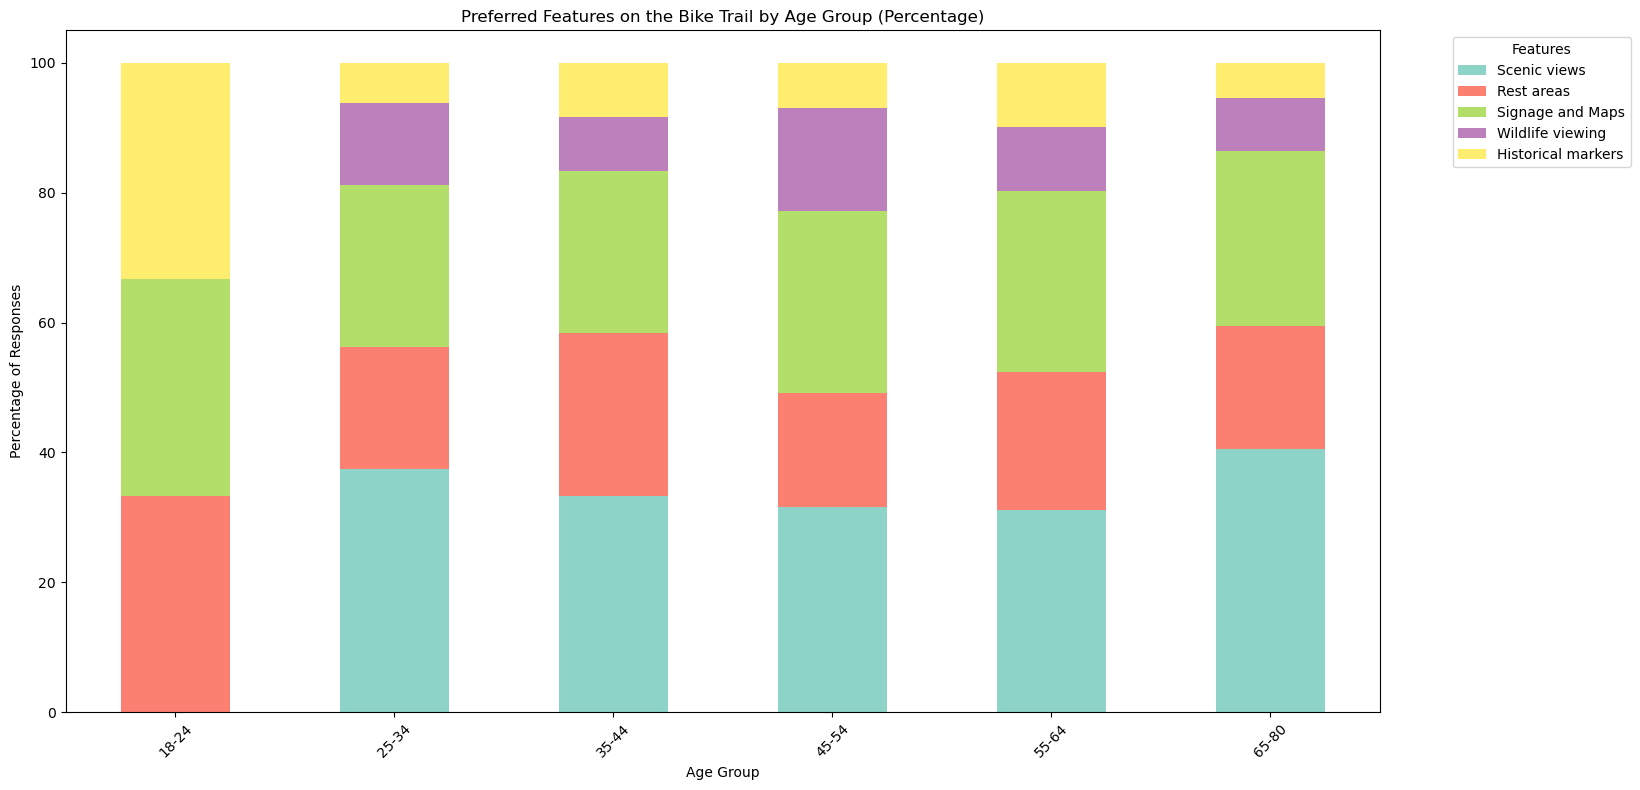

In [12]:
# Group by the age group and count the number of each preferred feature
features_counts = df_feature_preferance.groupby('Age_Group')[
    ['Scenic views', 'Rest areas', 'Signage and Maps', 'Wildlife viewing', 'Historical markers']
].sum()

# Calculate the percentage of each preferred feature within each age group
features_percentage = features_counts.div(features_counts.sum(axis=1), axis=0) * 100

# Plotting the bar chart for the percentages
features_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')
plt.title('Preferred Features on the Bike Trail by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Responses')
plt.legend(title='Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the chart
plt.show()